In [ ]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

# visualization settings
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving fear_greed_index.csv to fear_greed_index (1).csv


In [ ]:
# loading datasets
trader_df = pd.read_csv('/content/historical_data.csv')  # change filename if needed
sentiment_df = pd.read_csv('/content/fear_greed_index.csv') # change filename if needed

In [ ]:
# shape and head
print("🔹 Trader Data:")
print(trader_df.shape)
display(trader_df.head())

print("\n🔹 Sentiment Data:")
print(sentiment_df.shape)
display(sentiment_df.head())

🔹 Trader Data:
(211224, 16)


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12



🔹 Sentiment Data:
(2644, 4)


,timestamp,value,classification,date
0,1517463000,30,Fear,01-02-2018
1,1517549400,15,Extreme Fear,02-02-2018
2,1517635800,40,Fear,03-02-2018
3,1517722200,24,Extreme Fear,04-02-2018
4,1517808600,11,Extreme Fear,05-02-2018


In [ ]:
# null values
print("📌 Missing Values in Trader Data:")
print(trader_df.isnull().sum())

print("\n📌 Missing Values in Sentiment Data:")
print(sentiment_df.isnull().sum())

# data types
print("\n📌 Data Types - Trader Data:")
print(trader_df.dtypes)

print("\n📌 Data Types - Sentiment Data:")
print(sentiment_df.dtypes)


📌 Missing Values in Trader Data:
Account             0
Coin                0
Execution Price     0
Size Tokens         0
Size USD            0
Side                0
Timestamp IST       0
Start Position      0
Direction           0
Closed PnL          0
Transaction Hash    0
Order ID            0
Crossed             0
Fee                 0
Trade ID            0
Timestamp           0
dtype: int64

📌 Missing Values in Sentiment Data:
timestamp         0
value             0
classification    0
date              0
dtype: int64

📌 Data Types - Trader Data:
Account              object
Coin                 object
Execution Price     float64
Size Tokens         float64
Size USD            float64
Side                 object
Timestamp IST        object
Start Position      float64
Direction            object
Closed PnL          float64
Transaction Hash     object
Order ID              int64
Crossed                bool
Fee                 float64
Trade ID            float64
Timestamp           flo

In [ ]:
# convert 'date' in sentiment_df to datetime
sentiment_df['date'] = pd.to_datetime(sentiment_df['date'], format='%d-%m-%Y')

# convert 'Timestamp IST' in trader_df to datetime (keep only date part)
trader_df['date'] = pd.to_datetime(trader_df['Timestamp IST'], format='%d-%m-%Y %H:%M').dt.date
trader_df['date'] = pd.to_datetime(trader_df['date'])  # to match dtype

# check if it worked
print(trader_df[['Timestamp IST', 'date']].head())
print(sentiment_df[['date', 'classification']].head())

      Timestamp IST       date
0  02-12-2024 22:50 2024-12-02
1  02-12-2024 22:50 2024-12-02
2  02-12-2024 22:50 2024-12-02
3  02-12-2024 22:50 2024-12-02
4  02-12-2024 22:50 2024-12-02
        date classification
0 2018-02-01           Fear
1 2018-02-02   Extreme Fear
2 2018-02-03           Fear
3 2018-02-04   Extreme Fear
4 2018-02-05   Extreme Fear


In [ ]:
# merge both datasets on 'date'
merged_df = pd.merge(trader_df, sentiment_df[['date', 'classification']], on='date', how='left')

# check the result
print(merged_df.shape)
merged_df.head()


(211224, 18)


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02,Extreme Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02,Extreme Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02,Extreme Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02,Extreme Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02,Extreme Greed


In [ ]:
# average closed PnL per sentiment
merged_df.groupby('classification')['Closed PnL'].describe()

,count,mean,std,min,25%,50%,75%,max
classification,,,,,,,,
Extreme Fear,21400.0,34.537862,1136.056091,-31036.69194,0.0,0.0,5.635032,115287.00000
Extreme Greed,39992.0,67.892861,766.828294,-10259.46800,0.0,0.0,10.028709,44223.45187
Fear,61837.0,54.290400,935.355438,-35681.74723,0.0,0.0,5.590856,135329.09010
Greed,50303.0,42.743559,1116.028390,-117990.10410,0.0,0.0,4.944105,74530.52371
Neutral,37686.0,34.307718,517.122220,-24500.00000,0.0,0.0,3.995795,48504.09555


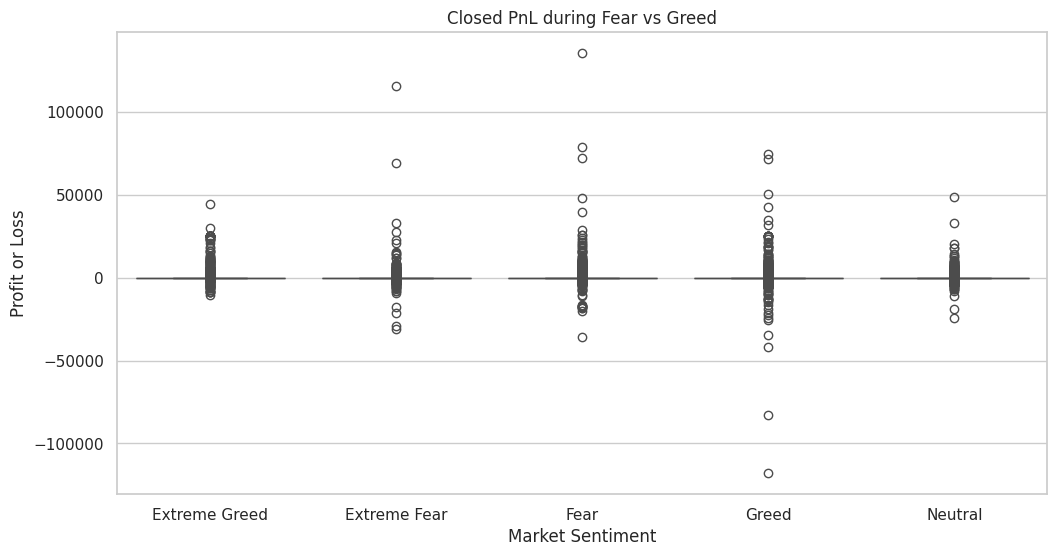

In [ ]:
# boxplot for PnL by sentiment
sns.boxplot(x='classification', y='Closed PnL', data=merged_df)
plt.title('Closed PnL during Fear vs Greed')
plt.ylabel('Profit or Loss')
plt.xlabel('Market Sentiment')
plt.savefig('Closed_PnL_by_Sentiment.png')  # save to outputs
plt.show()

In [ ]:
# total and average trade size
merged_df.groupby('classification')['Size USD'].agg(['mean', 'sum'])

,mean,sum
classification,,
Extreme Fear,5349.731843,1.144843e+08
Extreme Greed,3112.251565,1.244652e+08
Fear,7816.109931,4.833248e+08
Greed,5736.884375,2.885825e+08
Neutral,4782.732661,1.802421e+08


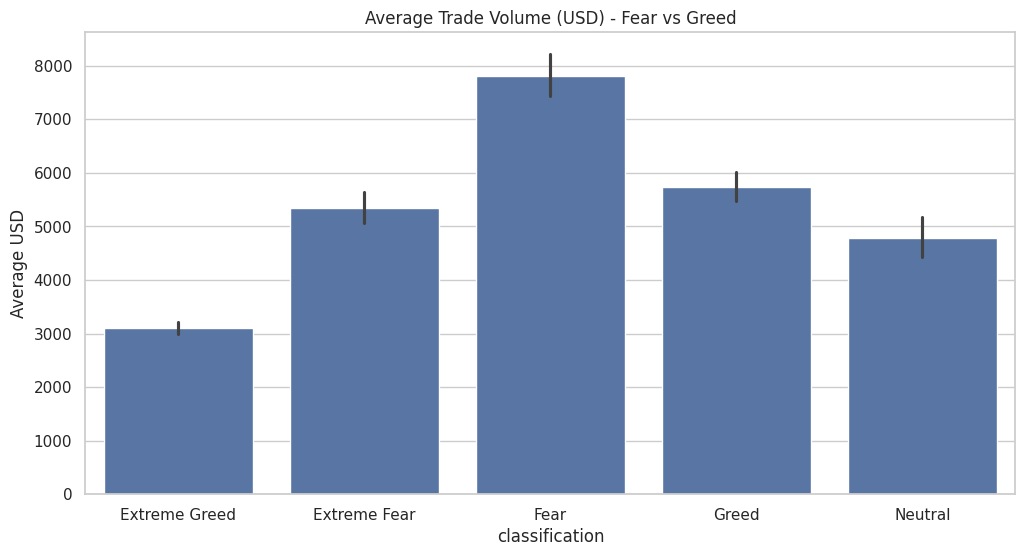

In [ ]:
sns.barplot(x='classification', y='Size USD', data=merged_df, estimator=np.mean)
plt.title('Average Trade Volume (USD) - Fear vs Greed')
plt.ylabel('Average USD')
plt.savefig('TradeVolume_by_Sentiment.png')
plt.show()


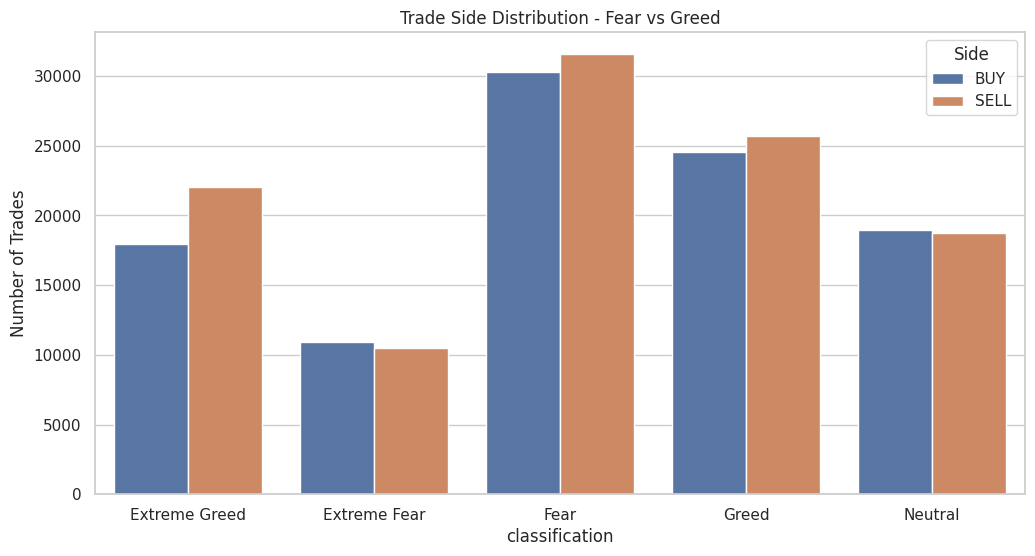

In [ ]:
# count of long/short trades during fear/greed
sns.countplot(x='classification', hue='Side', data=merged_df)
plt.title('Trade Side Distribution - Fear vs Greed')
plt.ylabel('Number of Trades')
plt.savefig('TradeSide_by_Sentiment.png')
plt.show()

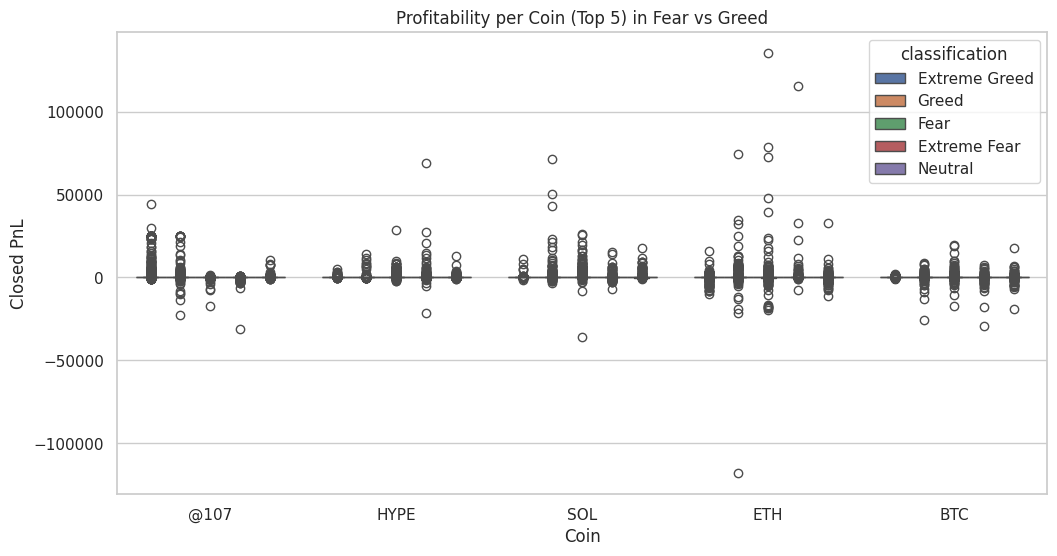

In [ ]:
# top coins by number of trades
top_coins = merged_df['Coin'].value_counts().head(5).index
coin_df = merged_df[merged_df['Coin'].isin(top_coins)]

sns.boxplot(x='Coin', y='Closed PnL', hue='classification', data=coin_df)
plt.title('Profitability per Coin (Top 5) in Fear vs Greed')
plt.savefig('Coinwise_PnL_Sentiment.png')
plt.show()


In [ ]:
from google.colab import files

files.download('Closed_PnL_by_Sentiment.png')
files.download('TradeVolume_by_Sentiment.png')
files.download('TradeSide_by_Sentiment.png')
files.download('Coinwise_PnL_Sentiment.png')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>